In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = '正5負2.csv'
df = pd.read_csv(data)

df = df[(df.正負樣本 == 1) | (df.正負樣本 == -1)]

In [4]:
# 查看數據集的維度
df.shape

(376, 37)

In [5]:
# 讓我們預覽數據集
df.head()

,代碼,股票,ROE_5Y,EPS_5Y,毛利率_5Y,ROE_2017,ROE_2018,ROE_2019,ROE_2020,ROE_2021,...,董監持股,現金殖利率,ROE_Test,EPS_Test,毛利率_Test,現金殖利率_Test,成交價_Test,董監持股_Test,符合數量,正負樣本
0,1101,台泥,11.00,3.69,26.64,6.88,12.94,12.54,13.10,9.54,...,8.38,6.95,1,1,1,1,1,0,5,1
1,1102,亞泥,9.81,4.05,24.67,4.65,9.77,13.54,11.07,10.01,...,27.37,7.10,0,1,1,1,1,1,5,1
5,1109,信大,14.89,2.40,30.69,10.82,17.31,17.87,15.95,12.51,...,36.22,6.58,1,1,1,1,1,1,6,1
7,1203,味王,12.00,1.86,32.54,13.71,12.26,11.86,11.08,11.10,...,28.84,3.55,1,1,1,0,1,1,5,1
9,1213,大飲,-9.02,-0.89,4.96,0.29,-13.76,-7.37,-4.96,-19.31,...,12.91,0.00,0,0,0,0,1,1,2,-1


In [6]:
# 讓我們預覽數據集
col_names = df.columns
col_names

Index(['代碼', '股票', 'ROE_5Y', 'EPS_5Y', '毛利率_5Y', 'ROE_2017', 'ROE_2018',
       'ROE_2019', 'ROE_2020', 'ROE_2021', '毛利率_2017', '毛利率_2018', '毛利率_2019',
       '毛利率_2020', '毛利率_2021', '負債比_2017', '負債比_2018', '負債比_2019', '負債比_2020',
       '負債比_2021', '稅後淨利率_2017', '稅後淨利率_2018', '稅後淨利率_2019', '稅後淨利率_2020',
       '稅後淨利率_2021', '現金股利', '成交價', '董監持股', '現金殖利率', 'ROE_Test', 'EPS_Test',
       '毛利率_Test', '現金殖利率_Test', '成交價_Test', '董監持股_Test', '符合數量', '正負樣本'],
      dtype='object')

In [7]:
# 從列名中刪除前導空格
df.columns = df.columns.str.strip()
df.columns

Index(['代碼', '股票', 'ROE_5Y', 'EPS_5Y', '毛利率_5Y', 'ROE_2017', 'ROE_2018',
       'ROE_2019', 'ROE_2020', 'ROE_2021', '毛利率_2017', '毛利率_2018', '毛利率_2019',
       '毛利率_2020', '毛利率_2021', '負債比_2017', '負債比_2018', '負債比_2019', '負債比_2020',
       '負債比_2021', '稅後淨利率_2017', '稅後淨利率_2018', '稅後淨利率_2019', '稅後淨利率_2020',
       '稅後淨利率_2021', '現金股利', '成交價', '董監持股', '現金殖利率', 'ROE_Test', 'EPS_Test',
       '毛利率_Test', '現金殖利率_Test', '成交價_Test', '董監持股_Test', '符合數量', '正負樣本'],
      dtype='object')

In [8]:
# 檢查 All 列的分佈
df['正負樣本'].value_counts()

 1    207
-1    169
Name: 正負樣本, dtype: int64

In [9]:
# 查看 All 列的百分比分佈
df['正負樣本'].value_counts()/np.float(len(df))

 1    0.550532
-1    0.449468
Name: 正負樣本, dtype: float64

In [10]:
# 查看數據集摘要
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376 entries, 0 to 937
Data columns (total 37 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   代碼          376 non-null    int64  
 1   股票          376 non-null    object 
 2   ROE_5Y      376 non-null    float64
 3   EPS_5Y      376 non-null    float64
 4   毛利率_5Y      376 non-null    float64
 5   ROE_2017    376 non-null    float64
 6   ROE_2018    376 non-null    float64
 7   ROE_2019    376 non-null    float64
 8   ROE_2020    376 non-null    float64
 9   ROE_2021    376 non-null    float64
 10  毛利率_2017    376 non-null    float64
 11  毛利率_2018    376 non-null    float64
 12  毛利率_2019    376 non-null    float64
 13  毛利率_2020    376 non-null    float64
 14  毛利率_2021    376 non-null    float64
 15  負債比_2017    376 non-null    float64
 16  負債比_2018    376 non-null    float64
 17  負債比_2019    376 non-null    float64
 18  負債比_2020    376 non-null    float64
 19  負債比_2021    376 non-null    f

In [11]:
# 檢查變量中的缺失值
df.isnull().sum()

代碼            0
股票            0
ROE_5Y        0
EPS_5Y        0
毛利率_5Y        0
ROE_2017      0
ROE_2018      0
ROE_2019      0
ROE_2020      0
ROE_2021      0
毛利率_2017      0
毛利率_2018      0
毛利率_2019      0
毛利率_2020      0
毛利率_2021      0
負債比_2017      0
負債比_2018      0
負債比_2019      0
負債比_2020      0
負債比_2021      0
稅後淨利率_2017    0
稅後淨利率_2018    0
稅後淨利率_2019    0
稅後淨利率_2020    0
稅後淨利率_2021    0
現金股利          0
成交價           0
董監持股          0
現金殖利率         0
ROE_Test      0
EPS_Test      0
毛利率_Test      0
現金殖利率_Test    0
成交價_Test      0
董監持股_Test     0
符合數量          0
正負樣本          0
dtype: int64

In [12]:
# 查看數值變量中的匯總統計
round(df.describe(),2)

,代碼,ROE_5Y,EPS_5Y,毛利率_5Y,ROE_2017,ROE_2018,ROE_2019,ROE_2020,ROE_2021,毛利率_2017,...,董監持股,現金殖利率,ROE_Test,EPS_Test,毛利率_Test,現金殖利率_Test,成交價_Test,董監持股_Test,符合數量,正負樣本
count,376.00,376.00,376.00,376.00,376.00,376.00,376.00,376.00,376.00,376.00,...,376.00,376.00,376.0,376.00,376.00,376.00,376.00,376.00,376.00,376.0
mean,3848.43,4.65,2.49,18.86,3.68,4.26,4.20,2.67,8.77,19.20,...,19.60,4.48,0.5,0.72,0.48,0.48,0.91,0.65,3.74,0.1
std,2271.16,20.76,3.54,27.13,28.60,26.15,20.23,45.23,21.34,27.35,...,17.05,3.29,0.5,0.45,0.50,0.50,0.29,0.48,1.78,1.0
min,1101.00,-215.93,-7.49,-316.78,-287.14,-315.90,-154.95,-786.28,-131.17,-333.36,...,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,1.00,-1.0
25%,2339.50,-0.74,-0.09,9.52,0.14,0.12,-0.40,-1.42,1.84,10.95,...,7.45,2.03,0.0,0.00,0.00,0.00,1.00,0.00,2.00,-1.0
50%,3013.50,9.96,2.32,19.16,7.82,8.68,8.26,8.62,10.54,19.10,...,14.83,4.80,0.0,1.00,0.00,0.00,1.00,1.00,5.00,1.0
75%,5540.00,14.38,4.07,28.81,15.04,14.65,13.48,14.28,17.17,29.60,...,27.85,6.44,1.0,1.00,1.00,1.00,1.00,1.00,5.00,1.0
max,9955.00,41.34,20.67,93.30,64.83,72.81,109.75,72.03,122.37,92.69,...,80.32,29.37,1.0,1.00,1.00,1.00,1.00,1.00,6.00,1.0


Text(0, 0.5, 'ROE_2021')

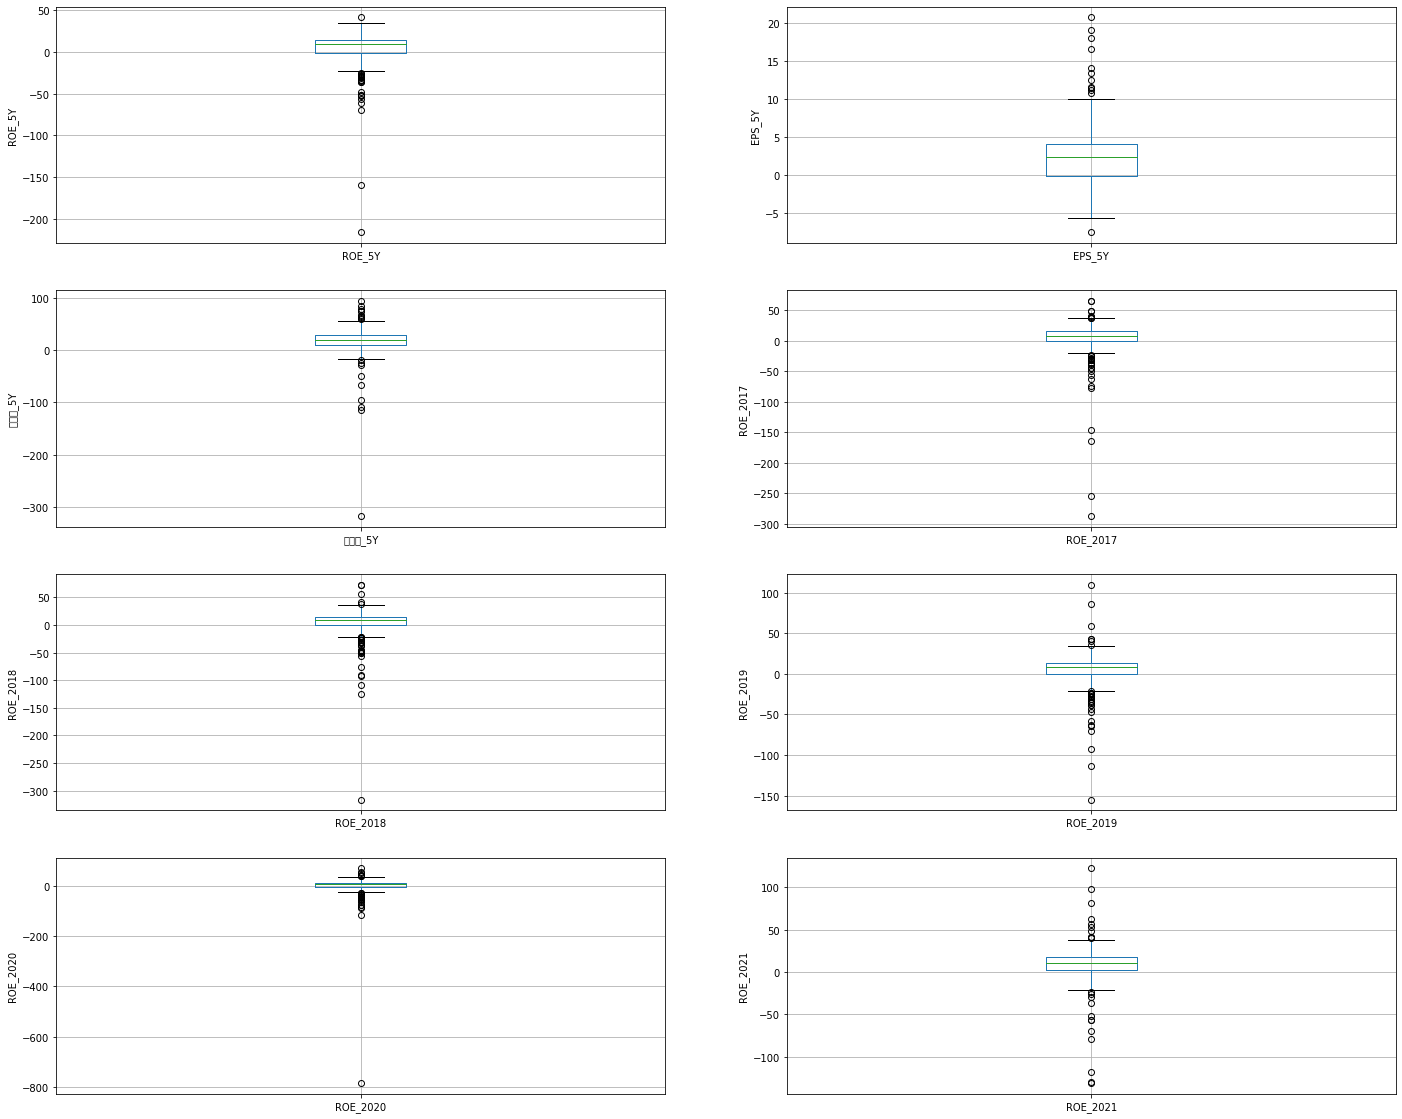

In [13]:
# 繪製箱線圖以可視化異常值
plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df.boxplot(column='ROE_5Y')
fig.set_title('')
fig.set_ylabel('ROE_5Y')

plt.subplot(4, 2, 2)
fig = df.boxplot(column='EPS_5Y')
fig.set_title('')
fig.set_ylabel('EPS_5Y')

plt.subplot(4, 2, 3)
fig = df.boxplot(column='毛利率_5Y')
fig.set_title('')
fig.set_ylabel('毛利率_5Y')

plt.subplot(4, 2, 4)
fig = df.boxplot(column='ROE_2017')
fig.set_title('')
fig.set_ylabel('ROE_2017')

plt.subplot(4, 2, 5)
fig = df.boxplot(column='ROE_2018')
fig.set_title('')
fig.set_ylabel('ROE_2018')

plt.subplot(4, 2, 6)
fig = df.boxplot(column='ROE_2019')
fig.set_title('')
fig.set_ylabel('ROE_2019')

plt.subplot(4, 2, 7)
fig = df.boxplot(column='ROE_2020')
fig.set_title('')
fig.set_ylabel('ROE_2020')

plt.subplot(4, 2, 8)
fig = df.boxplot(column='ROE_2021')
fig.set_title('')
fig.set_ylabel('ROE_2021')

Text(0, 0.5, '毛利率_2021')

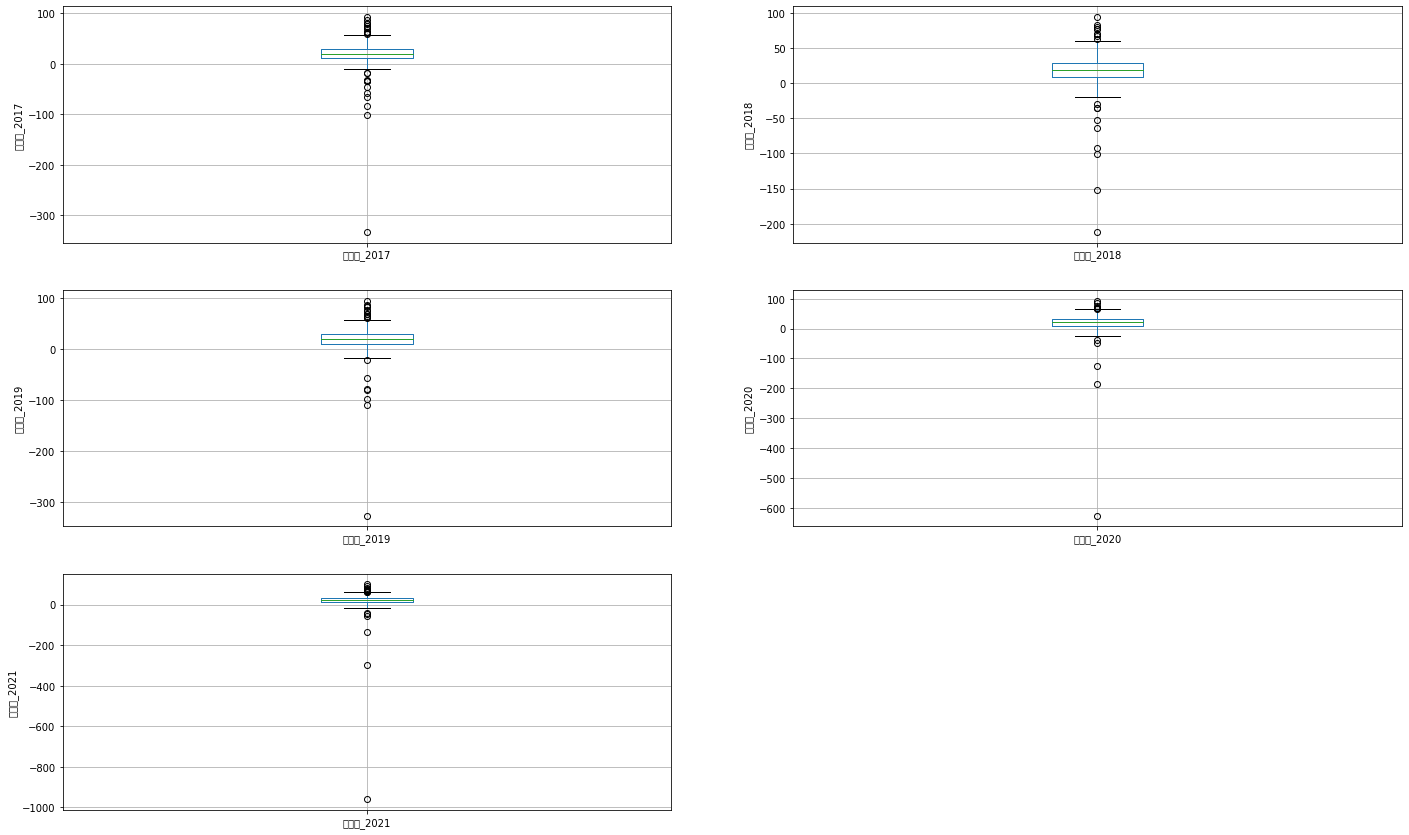

In [14]:
plt.figure(figsize=(24,20))

plt.subplot(4, 2, 1)
fig = df.boxplot(column='毛利率_2017')
fig.set_title('')
fig.set_ylabel('毛利率_2017')

plt.subplot(4, 2, 2)
fig = df.boxplot(column='毛利率_2018')
fig.set_title('')
fig.set_ylabel('毛利率_2018')

plt.subplot(4, 2, 3)
fig = df.boxplot(column='毛利率_2019')
fig.set_title('')
fig.set_ylabel('毛利率_2019')

plt.subplot(4, 2, 4)
fig = df.boxplot(column='毛利率_2020')
fig.set_title('')
fig.set_ylabel('毛利率_2020')

plt.subplot(4, 2, 5)
fig = df.boxplot(column='毛利率_2021')
fig.set_title('')
fig.set_ylabel('毛利率_2021')

Text(0, 0.5, '負債比_2021')

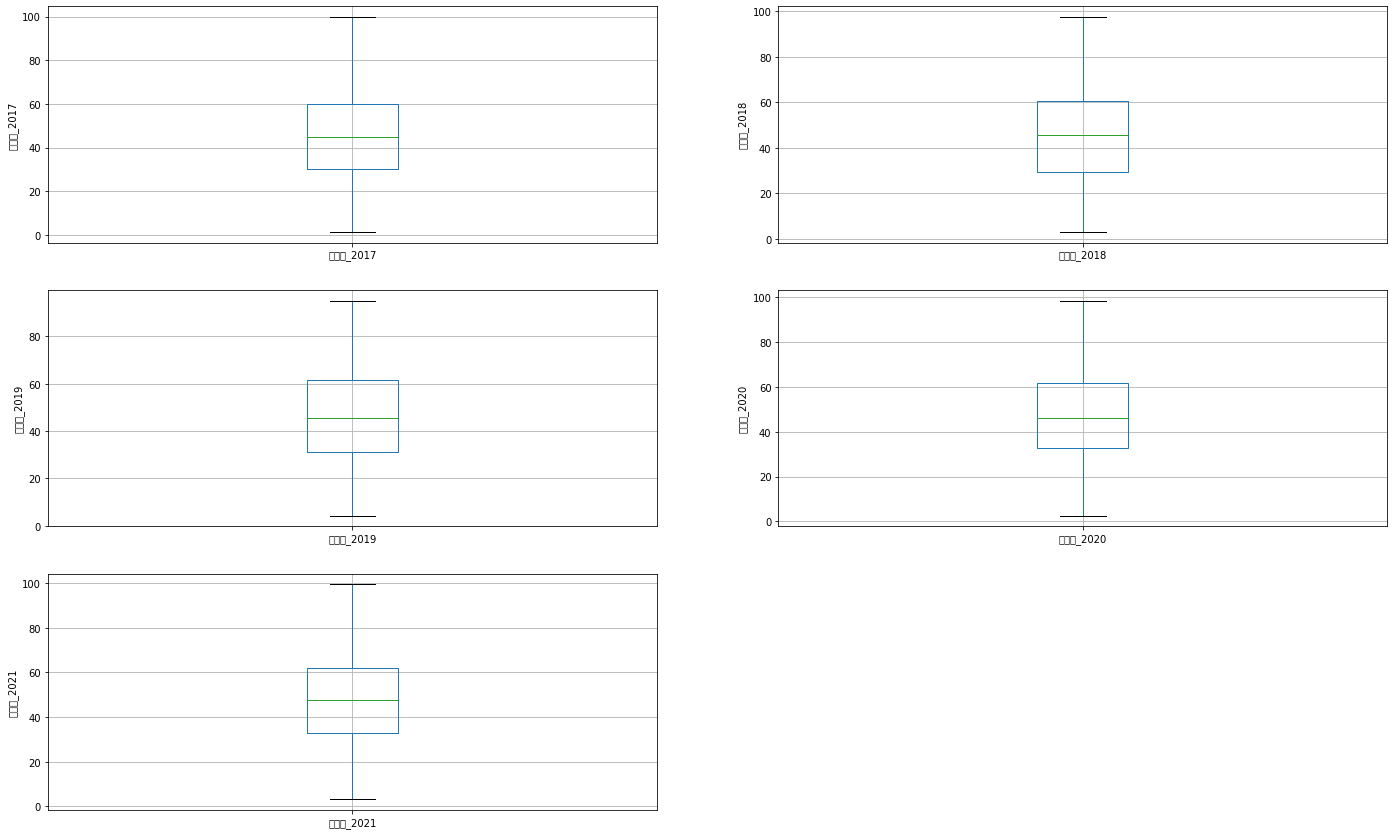

In [15]:
plt.figure(figsize=(24,20))

plt.subplot(4, 2, 1)
fig = df.boxplot(column='負債比_2017')
fig.set_title('')
fig.set_ylabel('負債比_2017')

plt.subplot(4, 2, 2)
fig = df.boxplot(column='負債比_2018')
fig.set_title('')
fig.set_ylabel('負債比_2018')

plt.subplot(4, 2, 3)
fig = df.boxplot(column='負債比_2019')
fig.set_title('')
fig.set_ylabel('負債比_2019')

plt.subplot(4, 2, 4)
fig = df.boxplot(column='負債比_2020')
fig.set_title('')
fig.set_ylabel('負債比_2020')

plt.subplot(4, 2, 5)
fig = df.boxplot(column='負債比_2021')
fig.set_title('')
fig.set_ylabel('負債比_2021')


Text(0, 0.5, '稅後淨利率_2021')

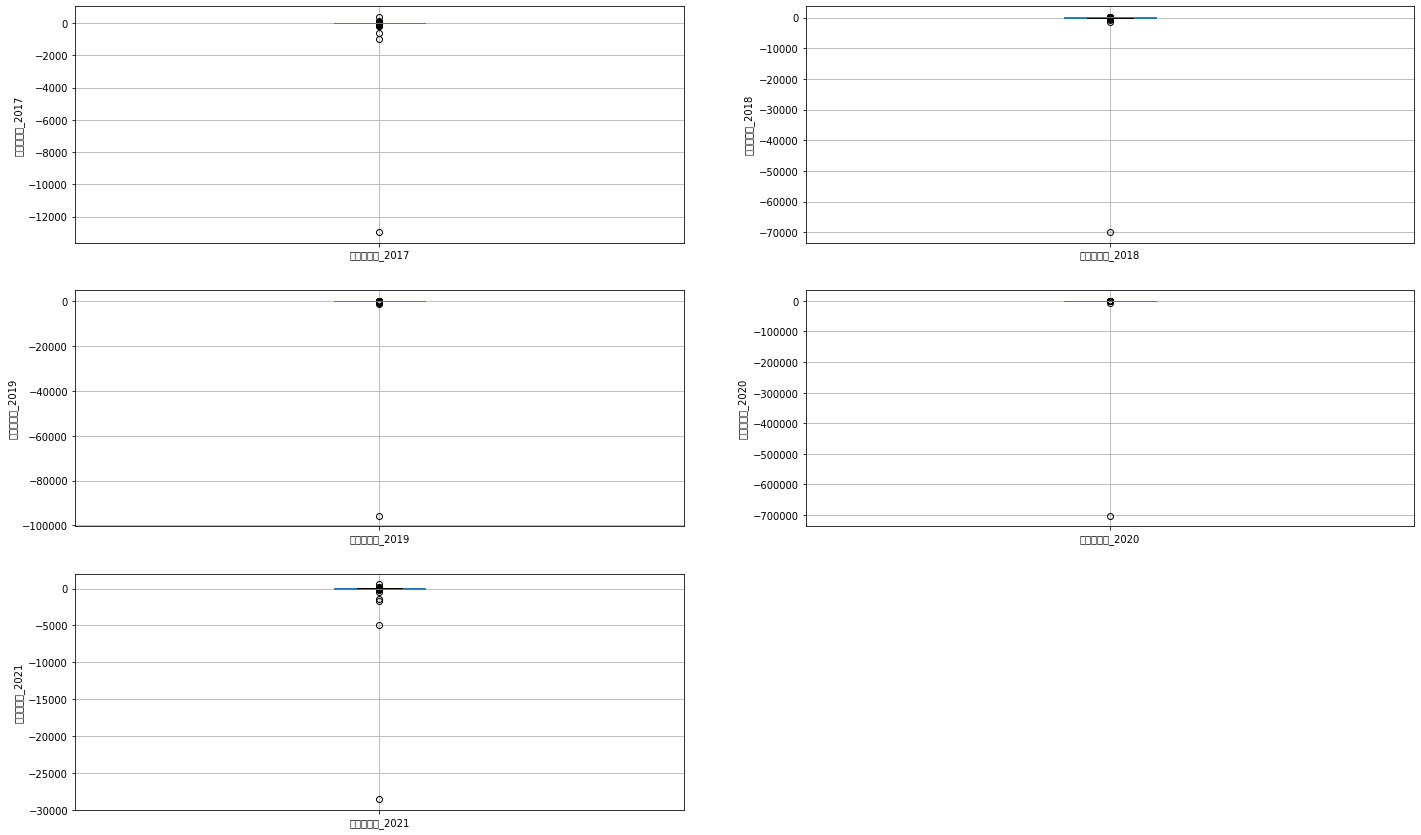

In [16]:
plt.figure(figsize=(24,20))

plt.subplot(4, 2, 1)
fig = df.boxplot(column='稅後淨利率_2017')
fig.set_title('')
fig.set_ylabel('稅後淨利率_2017')

plt.subplot(4, 2, 2)
fig = df.boxplot(column='稅後淨利率_2018')
fig.set_title('')
fig.set_ylabel('稅後淨利率_2018')

plt.subplot(4, 2, 3)
fig = df.boxplot(column='稅後淨利率_2019')
fig.set_title('')
fig.set_ylabel('稅後淨利率_2019')

plt.subplot(4, 2, 4)
fig = df.boxplot(column='稅後淨利率_2020')
fig.set_title('')
fig.set_ylabel('稅後淨利率_2020')

plt.subplot(4, 2, 5)
fig = df.boxplot(column='稅後淨利率_2021')
fig.set_title('')
fig.set_ylabel('稅後淨利率_2021')

Text(0, 0.5, '現金殖利率')

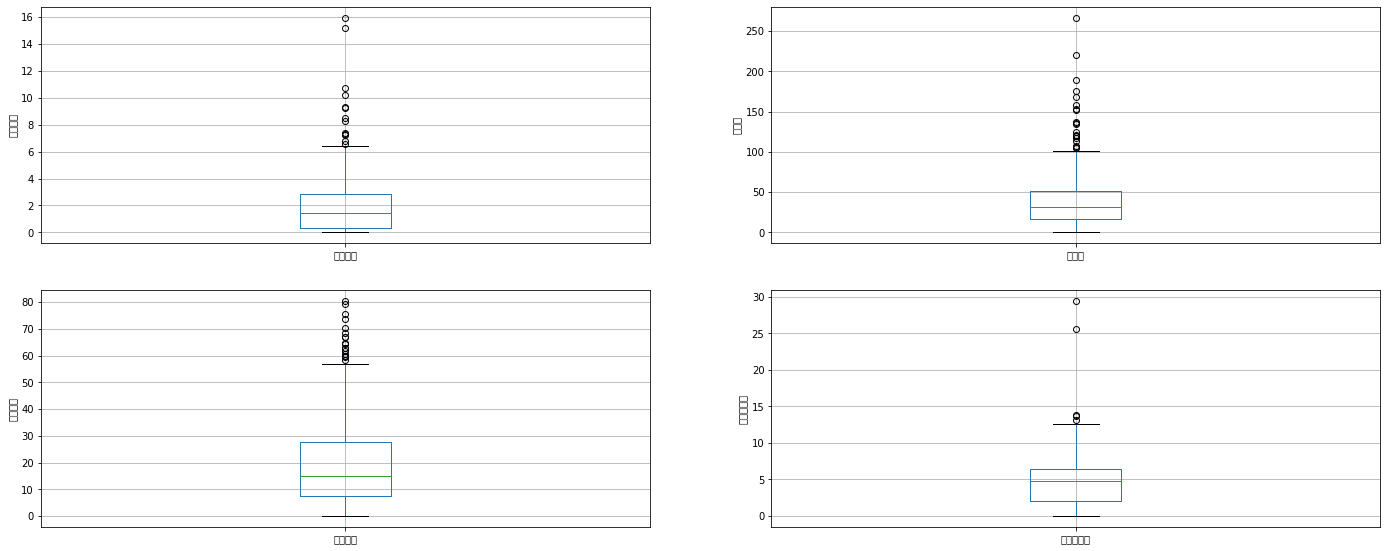

In [17]:
plt.figure(figsize=(24,20))

plt.subplot(4, 2, 1)
fig = df.boxplot(column='現金股利')
fig.set_title('')
fig.set_ylabel('現金股利')

plt.subplot(4, 2, 2)
fig = df.boxplot(column='成交價')
fig.set_title('')
fig.set_ylabel('成交價')

plt.subplot(4, 2, 3)
fig = df.boxplot(column='董監持股')
fig.set_title('')
fig.set_ylabel('董監持股')

plt.subplot(4, 2, 4)
fig = df.boxplot(column='現金殖利率')
fig.set_title('')
fig.set_ylabel('現金殖利率')

Text(0, 0.5, 'Number of pulsar stars')

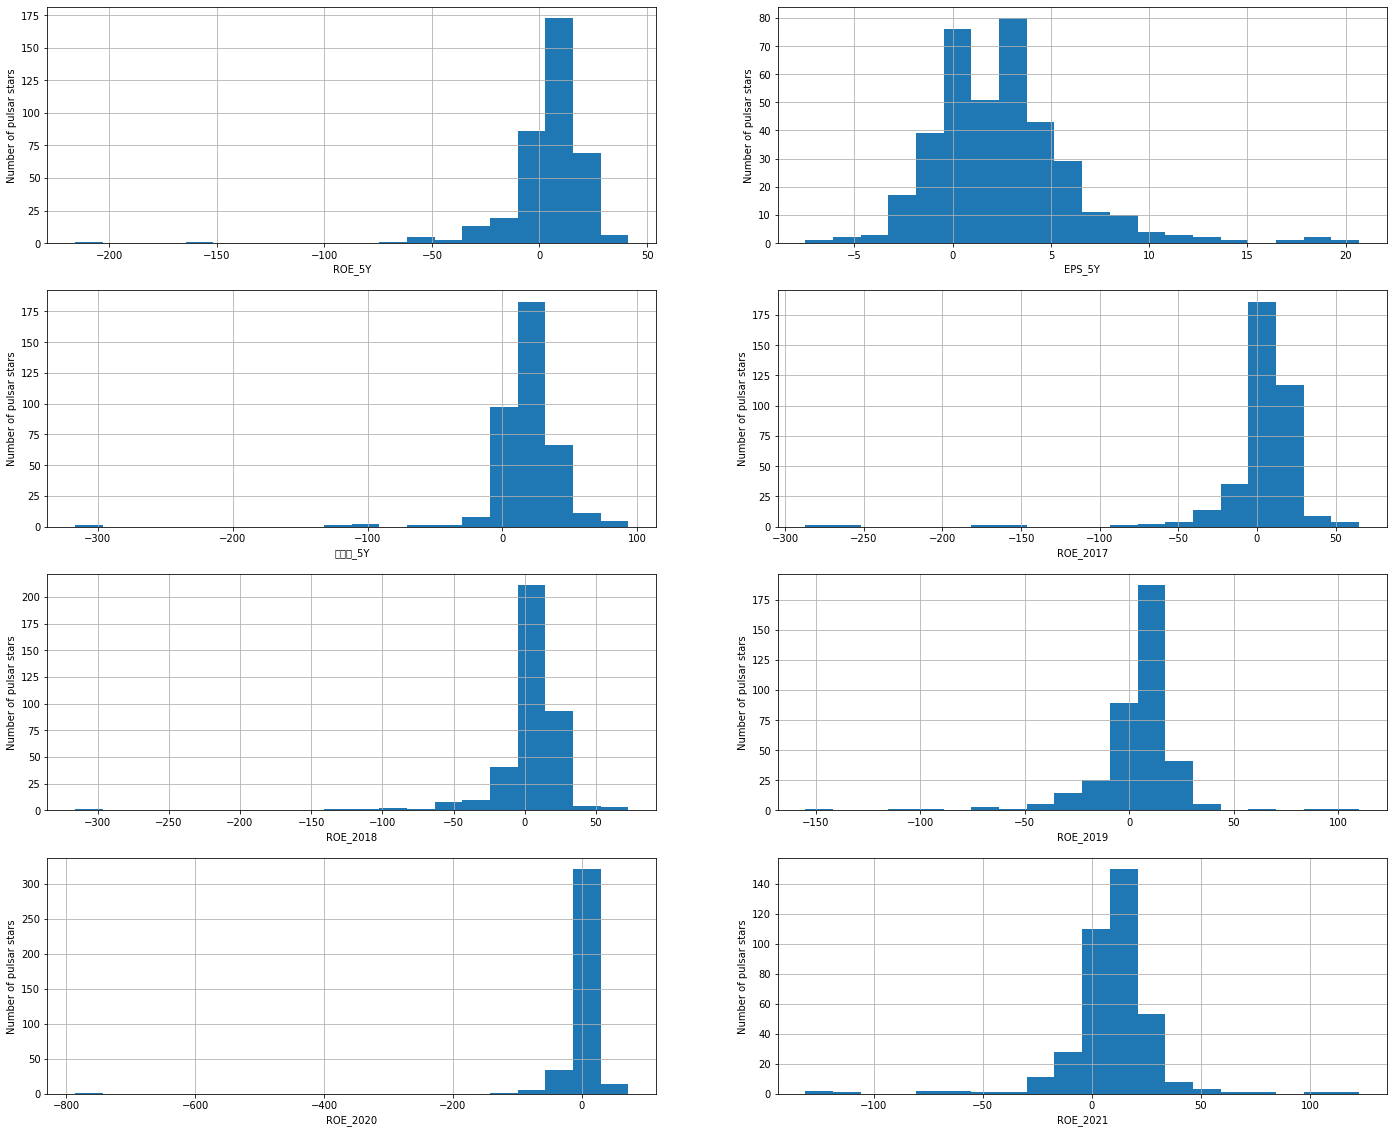

In [18]:
# 繪製直方圖以檢查分佈
plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df['ROE_5Y'].hist(bins=20)
fig.set_xlabel('ROE_5Y')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 2)
fig = df['EPS_5Y'].hist(bins=20)
fig.set_xlabel('EPS_5Y')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 3)
fig = df['毛利率_5Y'].hist(bins=20)
fig.set_xlabel('毛利率_5Y')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 4)
fig = df['ROE_2017'].hist(bins=20)
fig.set_xlabel('ROE_2017')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 5)
fig = df['ROE_2018'].hist(bins=20)
fig.set_xlabel('ROE_2018')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 6)
fig = df['ROE_2019'].hist(bins=20)
fig.set_xlabel('ROE_2019')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 7)
fig = df['ROE_2020'].hist(bins=20)
fig.set_xlabel('ROE_2020')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 8)
fig = df['ROE_2021'].hist(bins=20)
fig.set_xlabel('ROE_2021')
fig.set_ylabel('Number of pulsar stars')

Text(0, 0.5, 'Number of pulsar stars')

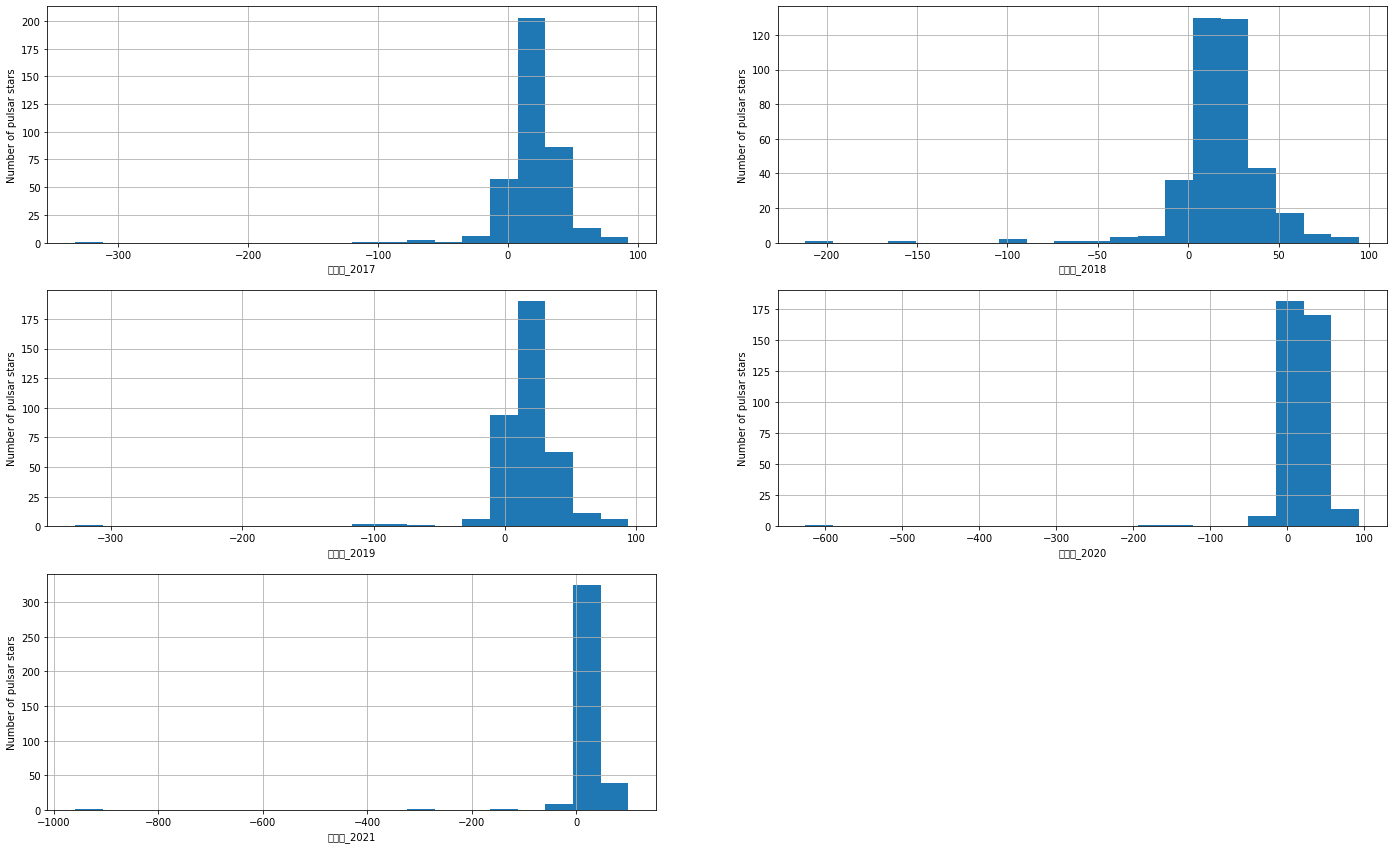

In [19]:
# 繪製直方圖以檢查分佈
plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df['毛利率_2017'].hist(bins=20)
fig.set_xlabel('毛利率_2017')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 2)
fig = df['毛利率_2018'].hist(bins=20)
fig.set_xlabel('毛利率_2018')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 3)
fig = df['毛利率_2019'].hist(bins=20)
fig.set_xlabel('毛利率_2019')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 4)
fig = df['毛利率_2020'].hist(bins=20)
fig.set_xlabel('毛利率_2020')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 5)
fig = df['毛利率_2021'].hist(bins=20)
fig.set_xlabel('毛利率_2021')
fig.set_ylabel('Number of pulsar stars')

Text(0, 0.5, 'Number of pulsar stars')

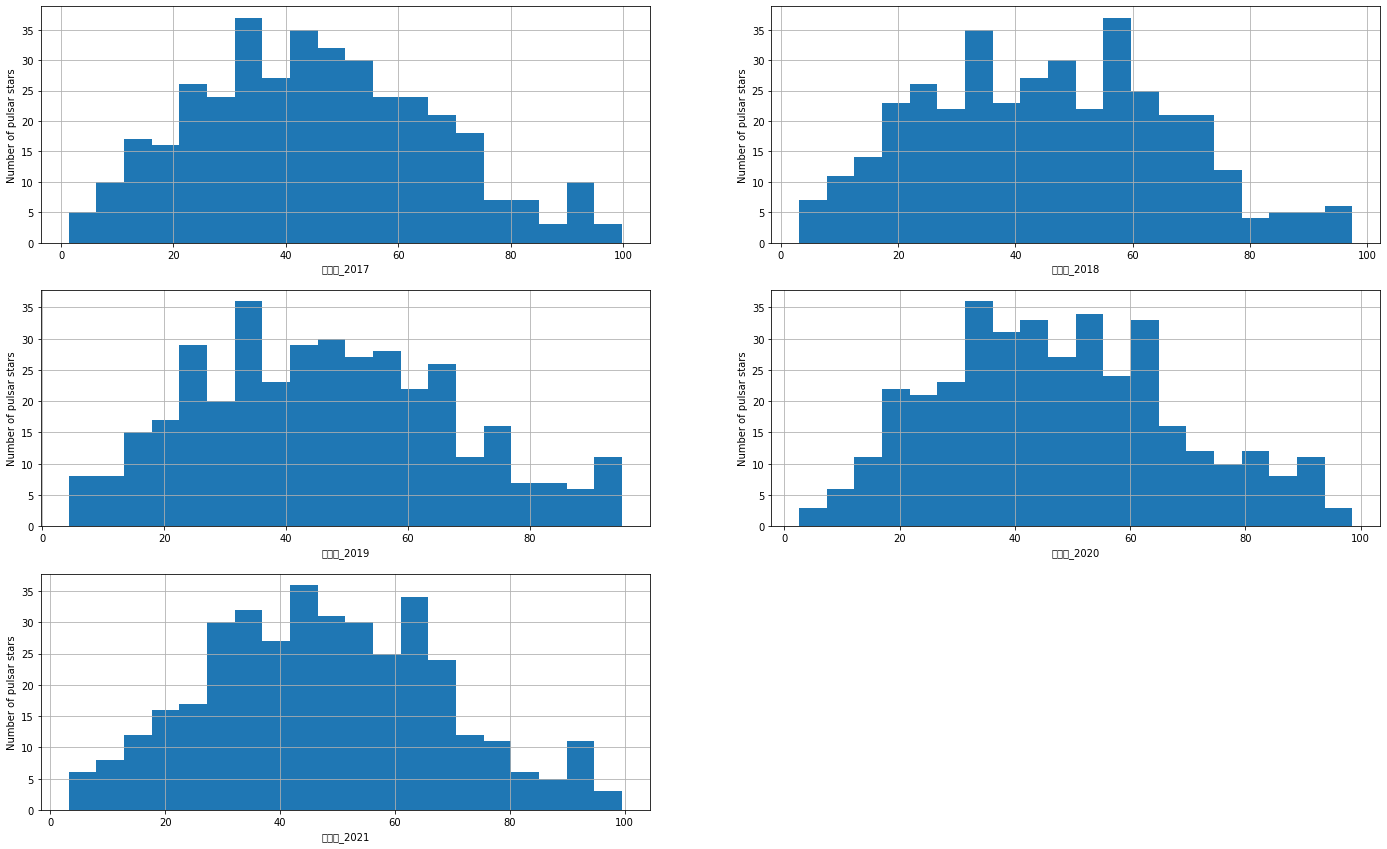

In [20]:
# 繪製直方圖以檢查分佈
plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df['負債比_2017'].hist(bins=20)
fig.set_xlabel('負債比_2017')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 2)
fig = df['負債比_2018'].hist(bins=20)
fig.set_xlabel('負債比_2018')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 3)
fig = df['負債比_2019'].hist(bins=20)
fig.set_xlabel('負債比_2019')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 4)
fig = df['負債比_2020'].hist(bins=20)
fig.set_xlabel('負債比_2020')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 5)
fig = df['負債比_2021'].hist(bins=20)
fig.set_xlabel('負債比_2021')
fig.set_ylabel('Number of pulsar stars')

Text(0, 0.5, 'Number of pulsar stars')

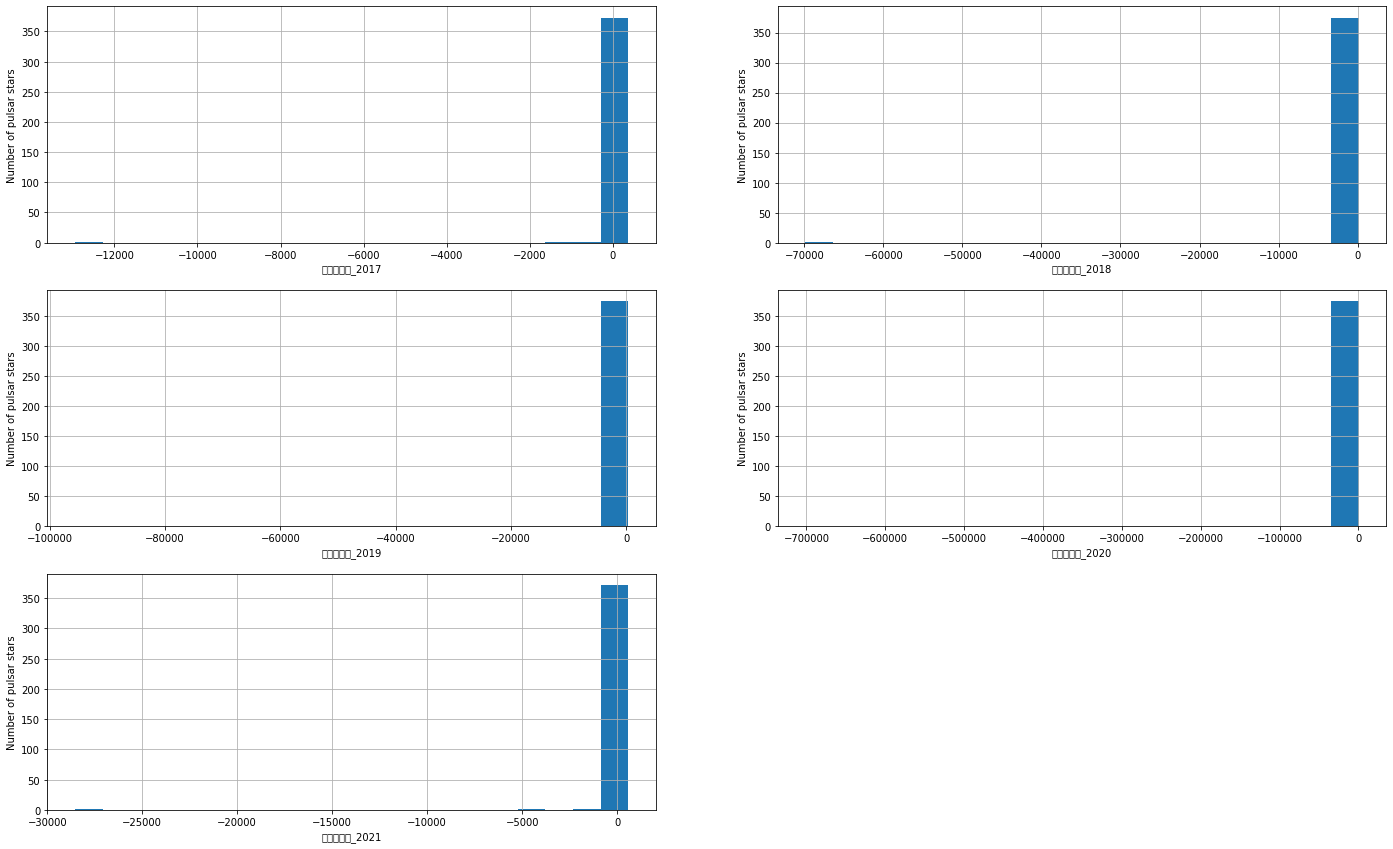

In [21]:
# 繪製直方圖以檢查分佈
plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df['稅後淨利率_2017'].hist(bins=20)
fig.set_xlabel('稅後淨利率_2017')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 2)
fig = df['稅後淨利率_2018'].hist(bins=20)
fig.set_xlabel('稅後淨利率_2018')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 3)
fig = df['稅後淨利率_2019'].hist(bins=20)
fig.set_xlabel('稅後淨利率_2019')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 4)
fig = df['稅後淨利率_2020'].hist(bins=20)
fig.set_xlabel('稅後淨利率_2020')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 5)
fig = df['稅後淨利率_2021'].hist(bins=20)
fig.set_xlabel('稅後淨利率_2021')
fig.set_ylabel('Number of pulsar stars')

Text(0, 0.5, 'Number of pulsar stars')

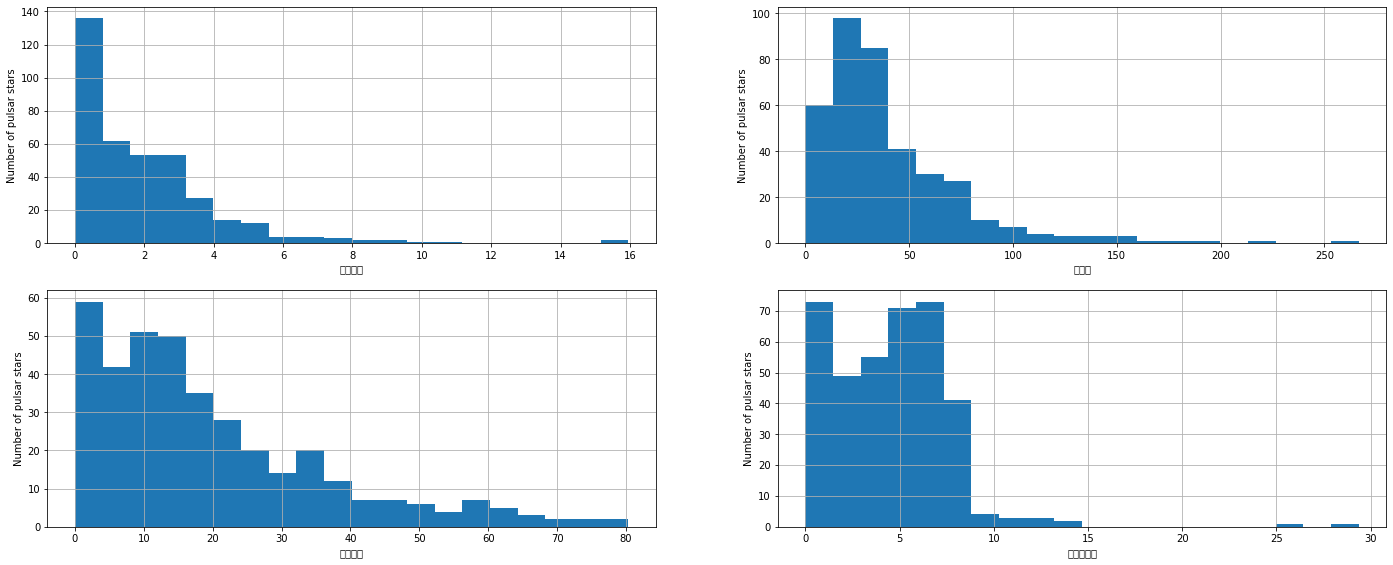

In [22]:
# 繪製直方圖以檢查分佈
plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df['現金股利'].hist(bins=20)
fig.set_xlabel('現金股利')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 2)
fig = df['成交價'].hist(bins=20)
fig.set_xlabel('成交價')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 3)
fig = df['董監持股'].hist(bins=20)
fig.set_xlabel('董監持股')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 4)
fig = df['現金殖利率'].hist(bins=20)
fig.set_xlabel('現金殖利率')
fig.set_ylabel('Number of pulsar stars')

In [23]:
X = df.drop(['代碼', '股票', 'ROE_Test', 'EPS_Test', '毛利率_Test', '現金殖利率_Test', '成交價_Test', '董監持股_Test','符合數量','正負樣本'], axis=1)

y = df['正負樣本']

In [24]:
# 將 X 和 y 拆分為訓練集和測試集
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [25]:
# 檢查 X_train 和 X_test 的形狀
X_train.shape, X_test.shape

((263, 27), (113, 27))

In [26]:
cols = X_train.columns

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [28]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [29]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [30]:
X_train.describe()

,ROE_5Y,EPS_5Y,毛利率_5Y,ROE_2017,ROE_2018,ROE_2019,ROE_2020,ROE_2021,毛利率_2017,毛利率_2018,...,負債比_2021,稅後淨利率_2017,稅後淨利率_2018,稅後淨利率_2019,稅後淨利率_2020,稅後淨利率_2021,現金股利,成交價,董監持股,現金殖利率
count,2.630000e+02,2.630000e+02,2.630000e+02,2.630000e+02,2.630000e+02,2.630000e+02,2.630000e+02,2.630000e+02,2.630000e+02,2.630000e+02,...,2.630000e+02,263.000000,2.630000e+02,263.000000,2.630000e+02,2.630000e+02,2.630000e+02,2.630000e+02,2.630000e+02,2.630000e+02
mean,-4.727946e-17,9.455892e-17,-6.754209e-17,2.701683e-17,2.701683e-17,6.754209e-18,-3.377104e-18,-5.065656e-17,6.754209e-18,6.754209e-18,...,8.189478e-17,0.000000,3.377104e-17,0.000000,-6.754209e-18,1.519697e-17,6.247643e-17,-1.688552e-16,-1.013131e-16,-3.613502e-16
std,1.001907e+00,1.001907e+00,1.001907e+00,1.001907e+00,1.001907e+00,1.001907e+00,1.001907e+00,1.001907e+00,1.001907e+00,1.001907e+00,...,1.001907e+00,1.001907,1.001907e+00,1.001907,1.001907e+00,1.001907e+00,1.001907e+00,1.001907e+00,1.001907e+00,1.001907e+00
min,-9.299365e+00,-2.408386e+00,-1.182257e+01,-1.011097e+01,-1.165015e+01,-6.253752e+00,-6.000758e+00,-6.883472e+00,-1.182405e+01,-8.876903e+00,...,-2.243211e+00,-16.112582,-1.618113e+01,-16.184273,-1.421176e+01,-1.230245e+01,-9.200154e-01,-1.137047e+00,-1.144450e+00,-1.326516e+00
25%,-3.429443e-01,-7.448513e-01,-3.458181e-01,-1.351019e-01,-1.372014e-01,-3.326503e-01,-3.057733e-01,-3.681596e-01,-2.760501e-01,-4.066348e-01,...,-7.353070e-01,0.067022,6.362941e-02,0.062989,-1.144474e-02,4.117891e-02,-7.509010e-01,-6.512810e-01,-7.138925e-01,-7.165305e-01
50%,2.606338e-01,-6.711484e-02,1.659078e-02,1.363266e-01,1.512780e-01,2.192603e-01,1.922729e-01,7.921820e-02,1.497999e-02,3.314823e-02,...,9.151055e-03,0.072394,6.476855e-02,0.064037,1.281788e-01,8.145331e-02,-2.387260e-01,-2.437186e-01,-3.229729e-01,7.776731e-02
75%,5.382514e-01,4.287899e-01,3.867631e-01,3.808552e-01,4.040618e-01,5.153554e-01,5.259664e-01,4.187283e-01,4.007249e-01,4.443338e-01,...,7.092227e-01,0.081045,6.630407e-02,0.065192,2.531338e-01,1.331882e-01,4.232361e-01,3.465702e-01,4.654727e-01,5.312338e-01
max,2.058081e+00,4.994119e+00,2.085886e+00,2.089084e+00,2.457657e+00,5.648738e+00,2.546084e+00,5.647084e+00,2.018100e+00,2.418334e+00,...,2.356204e+00,0.198796,7.997495e-02,0.087649,1.202067e+00,1.808046e+00,6.786770e+00,6.878849e+00,3.469608e+00,7.265943e+00


In [31]:
# 導入 SVC 分類器
from sklearn.svm import SVC


# 導入指標以計算準確性
from sklearn.metrics import accuracy_score


# 使用默認超參數實例化分類器
svc=SVC() 


# 將分類器擬合到訓練集
svc.fit(X_train,y_train)


# 對測試集進行預測
y_pred=svc.predict(X_test)


# 計算和打印準確度分數
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9558


In [32]:
# 使用 rbf 內核和 C=100 實例化分類器
svc=SVC(C=100.0) 


# 將分類器擬合到訓練集
svc.fit(X_train,y_train)


# 對測試集進行預測
y_pred=svc.predict(X_test)


# 計算和打印準確度分數
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.9646


In [33]:
# 使用 rbf 內核和 C=1000 實例化分類器
svc=SVC(C=1000.0) 


# 將分類器擬合到訓練集
svc.fit(X_train,y_train)


# 對測試集進行預測
y_pred=svc.predict(X_test)


# 計算和打印準確度分數
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=1000.0 : 0.9646


In [34]:
# 使用線性核和 C=1.0 實例化分類器
linear_svc=SVC(kernel='linear', C=1.0) 


# 將分類器擬合到訓練集
linear_svc.fit(X_train,y_train)


# 對測試集進行預測
y_pred_test=linear_svc.predict(X_test)


# 計算和打印準確度分數
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 0.9735


In [35]:
# 使用線性核和 C=100.0 實例化分類器
linear_svc100=SVC(kernel='linear', C=100.0) 


# 將分類器擬合到訓練集
linear_svc100.fit(X_train, y_train)


# 對測試集進行預測
y_pred=linear_svc100.predict(X_test)


# 計算和打印準確度分數
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=100.0 : 0.9646


In [36]:
# 用線性核和 C=1000.0 實例化分類器
linear_svc1000=SVC(kernel='linear', C=1000.0) 


# 將分類器擬合到訓練集
linear_svc1000.fit(X_train, y_train)


# 對測試集進行預測
y_pred=linear_svc1000.predict(X_test)


# 計算和打印準確度分數
print('Model accuracy score with linear kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=1000.0 : 0.9646


In [59]:
y_pred_train = linear_svc.predict(X_train)

y_pred_train

array([-1, -1,  1,  1,  1,  1, -1, -1, -1, -1,  1, -1, -1,  1,  1,  1,  1,
       -1,  1,  1, -1,  1, -1, -1, -1,  1, -1,  1,  1, -1, -1,  1,  1,  1,
        1, -1, -1,  1, -1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1, -1,  1,  1, -1,  1,  1,
        1,  1, -1,  1, -1,  1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1,  1,
       -1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1, -1,
        1,  1,  1,  1, -1,  1, -1, -1,  1,  1,  1, -1, -1, -1, -1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1,  1,  1, -1, -1,  1, -1,
        1,  1, -1,  1,  1, -1, -1,  1, -1, -1,  1, -1, -1,  1,  1, -1, -1,
       -1, -1,  1,  1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1,  1,  1,
       -1,  1,  1,  1,  1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1, -1,  1,
       -1,  1,  1, -1, -1,  1, -1,  1, -1,  1,  1,  1, -1, -1, -1,  1, -1,
        1,  1, -1,  1,  1

In [60]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 1.0000


In [39]:
# 打印訓練和測試集的分數

print('Training set score: {:.4f}'.format(linear_svc.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(linear_svc.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9735


In [40]:
# 檢查測試集中的類分佈
y_test.value_counts()

 1    63
-1    50
Name: 正負樣本, dtype: int64

In [41]:
# 檢查空準確度分數

null_accuracy = (63/(63+50))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.5575


In [42]:
# 使用多項式內核和 C=1.0 實例化分類器
poly_svc=SVC(kernel='poly', C=1.0) 


# 將分類器擬合到訓練集
poly_svc.fit(X_train,y_train)


# 對測試集進行預測
y_pred=poly_svc.predict(X_test)


# 計算和打印準確度分數
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.7788


In [43]:
# 使用多項式內核和 C=100.0 實例化分類器
poly_svc100=SVC(kernel='poly', C=100.0) 


# 將分類器擬合到訓練集
poly_svc100.fit(X_train, y_train)


# 對測試集進行預測
y_pred=poly_svc100.predict(X_test)


# 計算和打印準確度分數
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.9646


In [44]:
# 使用 sigmoid 內核和 C=1.0 實例化分類器
sigmoid_svc=SVC(kernel='sigmoid', C=1.0) 


# 將分類器擬合到訓練集
sigmoid_svc.fit(X_train,y_train)


# 對測試集進行預測
y_pred=sigmoid_svc.predict(X_test)


# 計算和打印準確度分數
print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=1.0 : 0.9735


In [45]:
# 使用 sigmoid 內核和 C=100.0 實例化分類器
sigmoid_svc100=SVC(kernel='sigmoid', C=100.0) 


# 將分類器擬合到訓練集
sigmoid_svc100.fit(X_train,y_train)


# 對測試集進行預測
y_pred=sigmoid_svc100.predict(X_test)


# 計算和打印準確度分數
print('Model accuracy score with sigmoid kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=100.0 : 0.9204


In [46]:
# 打印混淆矩陣並將其切成四塊

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[48  2]
 [ 1 62]]

True Positives(TP) =  48

True Negatives(TN) =  62

False Positives(FP) =  2

False Negatives(FN) =  1


<AxesSubplot:>

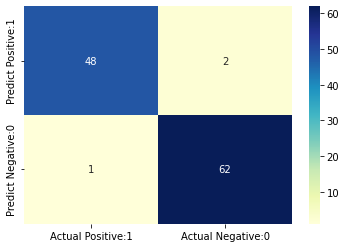

In [47]:
# 使用 seaborn 熱圖可視化混淆矩陣

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [48]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

          -1       0.98      0.96      0.97        50
           1       0.97      0.98      0.98        63

    accuracy                           0.97       113
   macro avg       0.97      0.97      0.97       113
weighted avg       0.97      0.97      0.97       113



In [49]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [50]:
# 打印分類精度

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9735


In [51]:
# 打印分類錯誤

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0265


In [52]:
# 打印精度分數

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9600


In [53]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9796


In [54]:
true_positive_rate = TP / float(TP + FN)

print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9796


In [55]:
false_positive_rate = FP / float(FP + TN)

print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.0312


In [56]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.9688


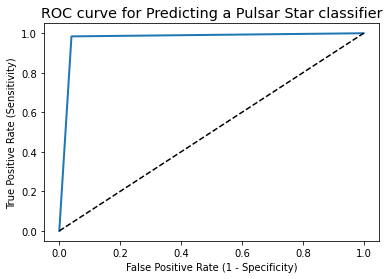

In [57]:
# 繪製 ROC 曲線

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting a Pulsar Star classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()